**Author: Srujana Golla**

In [1]:
'''
pip install tensorflow
pip install opencv-python
pip install tf-nightly

Dataset: https://www.kaggle.com/datasets/msambare/fer2013

'''

'\npip install tensorflow\npip install opencv-python\npip install tf-nightly\n\nDataset: https://www.kaggle.com/datasets/msambare/fer2013\n\nMI END SEM PROJECT\n\n'

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import cv2
import random
import os
import matplotlib.pyplot as plt
import numpy as np
from keras.layers import Conv2D,MaxPooling2D,Dropout,Flatten,Dense


dataset = "C:/Users/lazer/Downloads/archive/train"
emotion_folders = ['angry','disgust','fear','happy','neutral','sad','surprise']
training=[]
for i in emotion_folders:
    folder = os.path.join(dataset,i) #to pick the folder corresponding to the classes from the dataset
    for input_image in os.listdir(folder):
        img = cv2.imread(os.path.join(folder,input_image)) #picking image from each folder
        training.append([img,emotion_folders.index(i)])#img matrix,its corresponding emotion

face=[]
emotion=[]
for i,j in training:
    face.append(i)
    emotion.append(j)
face = np.array(face) 
face = face/255.0 #Normalising the data by dividing by the maximum grayscale value
emotion = np.array(emotion)
print(face.shape,emotion.shape)

(28709, 48, 48, 3) (28709,)


In [8]:
model = tf.keras.Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), activation='relu',input_shape=(48,48,3)))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.1))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.1))

model.add(Conv2D(256, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.1))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(7, activation='softmax'))

lr = 0.001
batch_size = 64
model.compile(optimizer = tf.keras.optimizers.RMSprop(learning_rate=lr), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.fit(face,emotion,epochs=30)
model.save("FER_MODEL.h5")

Epoch 1/30
898/898 [==============================] - 122s 135ms/step - loss: 1.6333 - accuracy: 0.3529
Epoch 2/30
898/898 [==============================] - 123s 136ms/step - loss: 1.3101 - accuracy: 0.5006
Epoch 3/30
898/898 [==============================] - 122s 136ms/step - loss: 1.1799 - accuracy: 0.5535
Epoch 4/30
898/898 [==============================] - 122s 136ms/step - loss: 1.0928 - accuracy: 0.5897
Epoch 5/30
898/898 [==============================] - 119s 132ms/step - loss: 1.0203 - accuracy: 0.6201
Epoch 6/30
898/898 [==============================] - 110s 123ms/step - loss: 0.9526 - accuracy: 0.6490
Epoch 7/30
898/898 [==============================] - 112s 124ms/step - loss: 0.8945 - accuracy: 0.6682
Epoch 8/30
898/898 [==============================] - 109s 122ms/step - loss: 0.8354 - accuracy: 0.6924
Epoch 9/30
898/898 [==============================] - 110s 123ms/step - loss: 0.7900 - accuracy: 0.7135
Epoch 10/30
898/898 [==============================] - 142s 158m

Found 7178 images belonging to 7 classes.
1/1 [==============================] - 0s 172ms/step
Accuracy =  0.5625


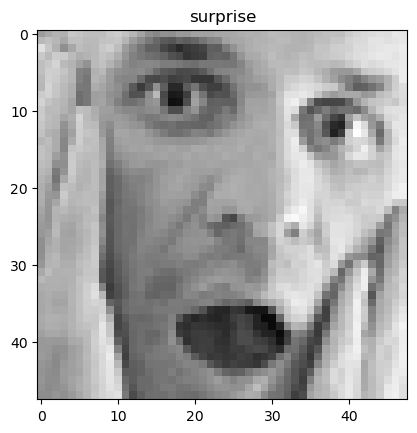

In [4]:
from keras.models import load_model


#Test the model
my_model = load_model('FER_MODEL.h5', compile=False)

dataset_for_testing = 'C:/Users/lazer/Downloads/archive/test'
datagenerator_test = keras.preprocessing.image.ImageDataGenerator(rescale = 1./255)
training_datagenerator_for_test = datagenerator_test.flow_from_directory(dataset_for_testing, target_size=(48,48),batch_size = 32,class_mode='categorical',shuffle=True)


#Generate a batch of images
test_img, test_lbl = training_datagenerator_for_test.__next__()
predict=my_model.predict(test_img)

predict = np.argmax(predict, axis=1)
test_emotions = np.argmax(test_lbl, axis=1)

from sklearn import metrics
print ("Accuracy = ", metrics.accuracy_score(test_emotions, predict))

#Confusion Matrix - verify accuracy of each class
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(test_emotions, predict)
#print(cm)

emotion_classes = ['angry','disgust', 'fear', 'happy','neutral','sad','surprise']
#Check results on a few select images
n=random.randint(0, test_img.shape[0] - 1)
image = test_img[n]
pred_labl = emotion_classes[predict[n]]
plt.imshow(image)
plt.title(pred_labl)
plt.show()

In [1]:
import os
import cv2
import numpy as np
from keras.preprocessing import image
import warnings
warnings.filterwarnings("ignore")
import keras.utils as image
from keras.models import  load_model
import matplotlib.pyplot as plt
import numpy as np

# load model
model = load_model("FER_MODEL.h5")


face_haar_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')


cap = cv2.VideoCapture(0)

while True:
    ret, test_img = cap.read()  # captures frame and returns boolean value and captured image
    if not ret:
        continue
    gray_img = cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB)

    faces_detected = face_haar_cascade.detectMultiScale(gray_img, 1.32, 5)

    for (x, y, w, h) in faces_detected:
        cv2.rectangle(test_img, (x, y), (x + w, y + h), (255, 0, 0), thickness=7)
        roi_gray = gray_img[y:y + w, x:x + h]  # cropping region of interest i.e. face area from  image
        roi_gray = cv2.resize(roi_gray, (48, 48))
        img_pixels = image.img_to_array(roi_gray)
        img_pixels = np.expand_dims(img_pixels, axis=0)
        img_pixels /= 255

        predictions = model.predict(img_pixels)

        # find max indexed array
        max_index = np.argmax(predictions[0])

        emotions = ['Angry','Disgust', 'Fear', 'Happy','Neutral','Sad','Surprise']

        predicted_emotion = emotions[max_index]

        cv2.putText(test_img, predicted_emotion, (int(x), int(y)), cv2.FONT_HERSHEY_PLAIN, 1, (0, 0, 255), 2)

    resized_img = cv2.resize(test_img, (1000, 700))
    cv2.imshow('Facial emotion analysis ', resized_img)

    if cv2.waitKey(10) == ord('q'):  # wait until 'q' key is pressed
        break

cap.release()
cv2.destroyAllWindows

1/1 [==============================] - 0s 30ms/step


<function destroyAllWindows>